In [1]:
from matplotlib import pyplot as plt
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics as m
from sklearn.model_selection import train_test_split
import xgboost as xgb
import seaborn as sns

In [2]:
x_original=pd.read_csv('../XLable_onlyDiabeticRemoved.txt')
y_original=pd.read_csv('../TargetLable_onlyDiabeticRemoved.txt')

# x_original=pd.read_csv('../_xlable4_withNa_AllColumns.txt')
# y_original=pd.read_csv('../_targelable4_withNa_AllColumns.txt')

y_original=y_original[['Unnamed: 0','L101700']]

In [3]:
data= pd.merge(x_original,y_original, how='inner',left_on='Unnamed: 0', right_on='Unnamed: 0')
 
#combine FIELD_6 and FIELD_7 both represent the same thing (Women's marital status)
data['max']=np.min(data[['FIELD_6','FIELD_7']],axis=1)
data=data.drop(columns=['FIELD_6','FIELD_7','B_DAY'])
print(data.shape)

(185843, 407)


In [4]:
# filter the data set 
data=data[data.FIELD_16!=1] # exclude people who are diagnosed for (diabetes) 
data=data[data.FIELD_23!=1] # exclude people who are on medication for diabetes

data=data[data.FIELD_15!=1] # exclude people who are diagnosed for (high blood pressure)
data=data[data.FIELD_22!=1] # exclude people who are on medication for high blood pressure

data=data[data.FIELD_17!=1] # exclude people who are diagnosed for hyperlipidemia
data=data[data.FIELD_24!=1] # exclude people who are on medication for hyperlipidemia

print(data.shape)

(169024, 407)


In [5]:
mydata=data[['L101700_y','L101700_x', 'L101300', 'L103000', 'SEX', 'L100700', 'L101200', 'S000300', 
             'S000501', 'L100800', 'S000502', 'L101600', 'S000100' ]].dropna() 

print(mydata.shape)

mydata.head()

(154383, 13)


,L101700_y,L101700_x,L101300,L103000,SEX,L100700,L101200,S000300,S000501,L100800,S000502,L101600,S000100
0,14.0,13.0,8.0,53.0,1.0,3.0,17.0,20.1,121.0,77.0,67.0,49.0,159.8
1,15.0,14.0,9.0,53.0,1.0,3.0,21.0,19.7,117.0,89.0,76.0,51.0,159.5
2,14.0,15.0,10.0,41.0,1.0,3.8,19.0,20.2,135.0,78.0,82.0,56.0,159.0
3,10.0,13.0,20.0,80.0,1.0,4.1,19.0,24.7,112.0,98.0,70.0,49.0,155.2
4,12.0,10.0,12.0,58.0,1.0,3.7,15.0,24.8,118.0,95.0,71.0,42.0,155.3


In [6]:
for i in mydata.columns:
    if (i != 'L101700_y'): 
        mydata['p_'+i]=np.power(mydata[i],0.03)
        mydata['p_'+i]=np.power(mydata[i],3)
#         mydata['l_'+i]=np.log10(mydata[i])

mydata=mydata.dropna()

print(mydata.shape)
mydata.head()

# mydata=np.log2(mydata).dropna()
# mydata=np.power(mydata,0.03)

(154383, 25)


,L101700_y,L101700_x,L101300,L103000,SEX,L100700,L101200,S000300,S000501,L100800,...,p_L103000,p_SEX,p_L100700,p_L101200,p_S000300,p_S000501,p_L100800,p_S000502,p_L101600,p_S000100
0,14.0,13.0,8.0,53.0,1.0,3.0,17.0,20.1,121.0,77.0,...,148877.0,1.0,27.000,4913.0,8120.601,1771561.0,456533.0,300763.0,117649.0,4080659.192
1,15.0,14.0,9.0,53.0,1.0,3.0,21.0,19.7,117.0,89.0,...,148877.0,1.0,27.000,9261.0,7645.373,1601613.0,704969.0,438976.0,132651.0,4057719.875
2,14.0,15.0,10.0,41.0,1.0,3.8,19.0,20.2,135.0,78.0,...,68921.0,1.0,54.872,6859.0,8242.408,2460375.0,474552.0,551368.0,175616.0,4019679.000
3,10.0,13.0,20.0,80.0,1.0,4.1,19.0,24.7,112.0,98.0,...,512000.0,1.0,68.921,6859.0,15069.223,1404928.0,941192.0,343000.0,117649.0,3738308.608
4,12.0,10.0,12.0,58.0,1.0,3.7,15.0,24.8,118.0,95.0,...,195112.0,1.0,50.653,3375.0,15252.992,1643032.0,857375.0,357911.0,74088.0,3745539.377


In [7]:
# x=mydata[['L103000_x', 'S000501', 'L100700', 'SEX', 'L103100', 'L190300', 'L190400', 
#              'L101300', 'S000502']] 

x=mydata.iloc[:,1:]
y=mydata[['L101700_y']]

In [8]:
xtrain,xtest,ytrain,ytest=train_test_split(x, y, random_state=42, test_size=0.2)

In [13]:
regr = RandomForestRegressor(max_depth=7, random_state=0,verbose =0,n_estimators=500)
regr.fit(xtrain, ytrain) 
print(regr.feature_importances_)
ypred=regr.predict(xtest)


[4.67919808e-01 7.76637959e-03 1.81125640e-03 2.51589468e-04
 2.58657695e-03 3.94356064e-03 7.11307470e-03 2.68193431e-03
 3.10676987e-03 1.63773016e-03 2.46312518e-03 2.48876753e-03
 4.62069732e-01 6.91658086e-03 2.12705426e-03 2.75323702e-04
 2.70740634e-03 3.97648605e-03 6.77193817e-03 2.23819542e-03
 3.23957620e-03 1.69863007e-03 2.07474322e-03 2.13376165e-03]


mean_squared_error 491.2886450543607
root mean_squared_error 22.16503203368677
mean_absolute_error 8.882028560483555
r2_score 0.6900586494836445


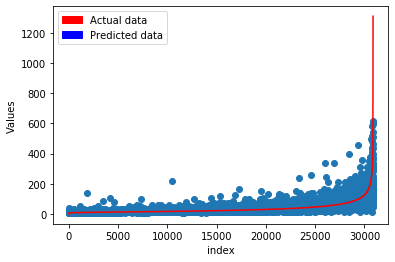

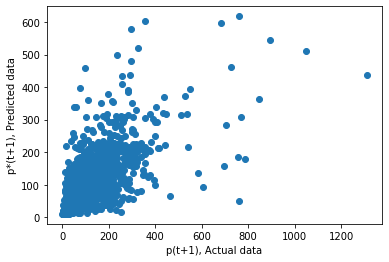

In [14]:
import math
print('mean_squared_error',m.mean_squared_error(ytest, ypred))
print('root mean_squared_error',math.sqrt(m.mean_squared_error(ytest, ypred)))
print('mean_absolute_error',m.mean_absolute_error(ytest, ypred))
print('r2_score',m.r2_score(ytest, ypred))

ypredPD=pd.DataFrame()
ypredPD['t + 1']=ytest.values.ravel()
ypredPD['pred (t +1)']=ypred 
ypredPD.tail(10)

import matplotlib.patches as mpatches
plt.ylabel('Values')
plt.xlabel('index')
red_patch = mpatches.Patch(color='red', label='Actual data')
blue_patch = mpatches.Patch(color='blue', label='Predicted data')
plt.legend(handles=[red_patch,blue_patch])

ypredPD=ypredPD.sort_values(by=['t + 1'])
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['pred (t +1)'][:ypredPD.shape[0]])
plt.plot(np.arange(0,ypredPD.shape[0],1),ypredPD['t + 1'][:ypredPD.shape[0]],color='red')
plt.show()

plt.ylabel('p*(t+1), Predicted data')
plt.xlabel('p(t+1), Actual data')
plt.scatter(ypredPD['t + 1'][:ypredPD.shape[0]],ypredPD['pred (t +1)'][:ypredPD.shape[0]])


In [15]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror',max_depth = 10, alpha = 200, n_estimators = 50, 
                          booster='gbtree',
                          colsample_bytree = 0.6,learning_rate = 0.08,gamma=10, tree_method = 'gpu_hist'
                         )

xg_reg.fit(xtrain, ytrain) 

XGBRegressor(alpha=200, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=10,
             importance_type='gain', learning_rate=0.08, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=50,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, tree_method='gpu_hist',
             verbosity=1)

mean_squared_error 554.5449713504539
root mean_squared_error 23.548778553259485
mean_absolute_error 9.001409832181972
r2_score 0.6501518627132215


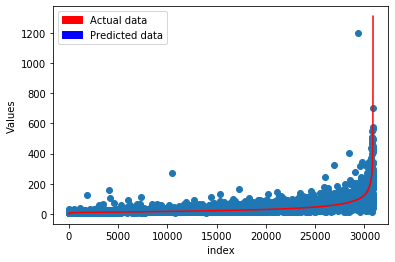

,t + 1,pred (t +1)
8197,1.0,10.870616
17935,2.0,11.196069
24660,3.0,13.987216
15937,4.0,17.162437
8119,4.0,9.028581
9916,4.0,12.839353
27339,4.0,16.415953
4997,4.0,11.308180
10563,4.0,9.475964
19709,5.0,9.888028


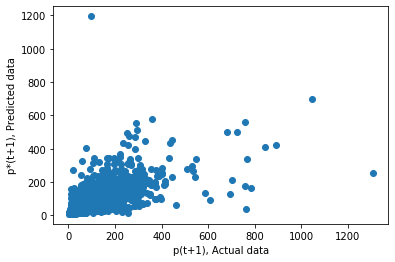

In [16]:
ypred = xg_reg.predict(xtest)
 
import math
print('mean_squared_error',m.mean_squared_error(ytest, ypred))
print('root mean_squared_error',math.sqrt(m.mean_squared_error(ytest, ypred)))
print('mean_absolute_error',m.mean_absolute_error(ytest, ypred))
print('r2_score',m.r2_score(ytest, ypred))

ypredPD=pd.DataFrame()
ypredPD['t + 1']=ytest.values.ravel()
ypredPD['pred (t +1)']=ypred
ypredPD.head(10)


import matplotlib.patches as mpatches
plt.ylabel('Values')
plt.xlabel('index')
red_patch = mpatches.Patch(color='red', label='Actual data')
blue_patch = mpatches.Patch(color='blue', label='Predicted data')
plt.legend(handles=[red_patch,blue_patch])

ypredPD=ypredPD.sort_values(by=['t + 1'])
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['pred (t +1)'][:ypredPD.shape[0]])
plt.plot(np.arange(0,ypredPD.shape[0],1),ypredPD['t + 1'][:ypredPD.shape[0]],color='red')
plt.show()

plt.ylabel('p*(t+1), Predicted data')
plt.xlabel('p(t+1), Actual data')
plt.scatter(ypredPD['t + 1'][:ypredPD.shape[0]],ypredPD['pred (t +1)'][:ypredPD.shape[0]])

ypredPD.head(10)